I got this dataset from kaggle

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
dataframe=pd.read_csv("1553768847-housing.csv")
print("Data about the dataframe")
print(dataframe.sample(5))
print(f"The shape of the dataframe is : {dataframe.shape}")
print(f"The info about the dataset ")
print(dataframe.info())
print("The description about the dataset : ")
print(dataframe.describe())

Data about the dataframe
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1612     -122.08     37.87                  26         2405           564.0   
7729     -118.13     33.93                  38         2040           458.0   
10508    -117.68     33.52                   5         3621           632.0   
14489    -117.26     32.85                  42         1761           329.0   
15486    -117.13     33.14                   5         2618           539.0   

       population  households  median_income ocean_proximity  \
1612          680         531         2.4896        NEAR BAY   
7729         1775         445         3.5227       <1H OCEAN   
10508        1546         567         5.7530       <1H OCEAN   
14489         480         255         5.3787      NEAR OCEAN   
15486        1320         512         4.1053       <1H OCEAN   

       median_house_value  
1612                73400  
7729               202400  
10508              322800  
144

In [3]:
#checking for the null values and duplicated rows
print(dataframe.isna().sum())
print(dataframe.duplicated().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64
0


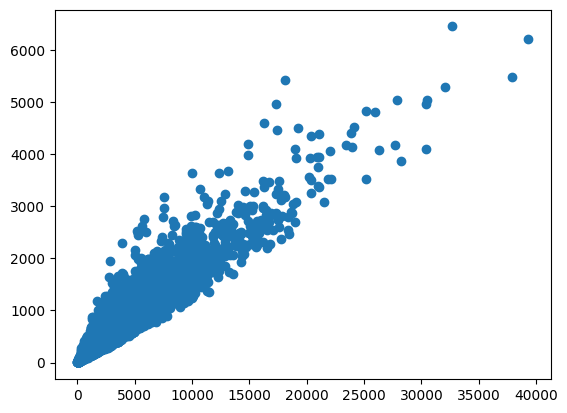

In [4]:
plt.scatter(dataframe["total_rooms"],dataframe["total_bedrooms"])

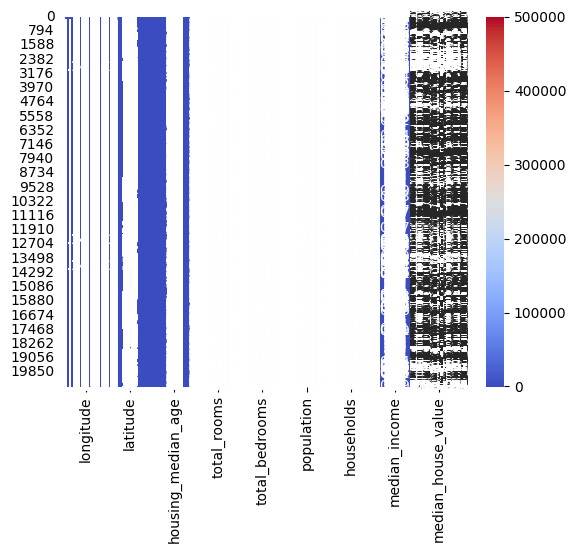

In [7]:
sns.heatmap(dataframe.drop(columns=["ocean_proximity"],inplace=False),annot=True,cmap="coolwarm")
plt.show()

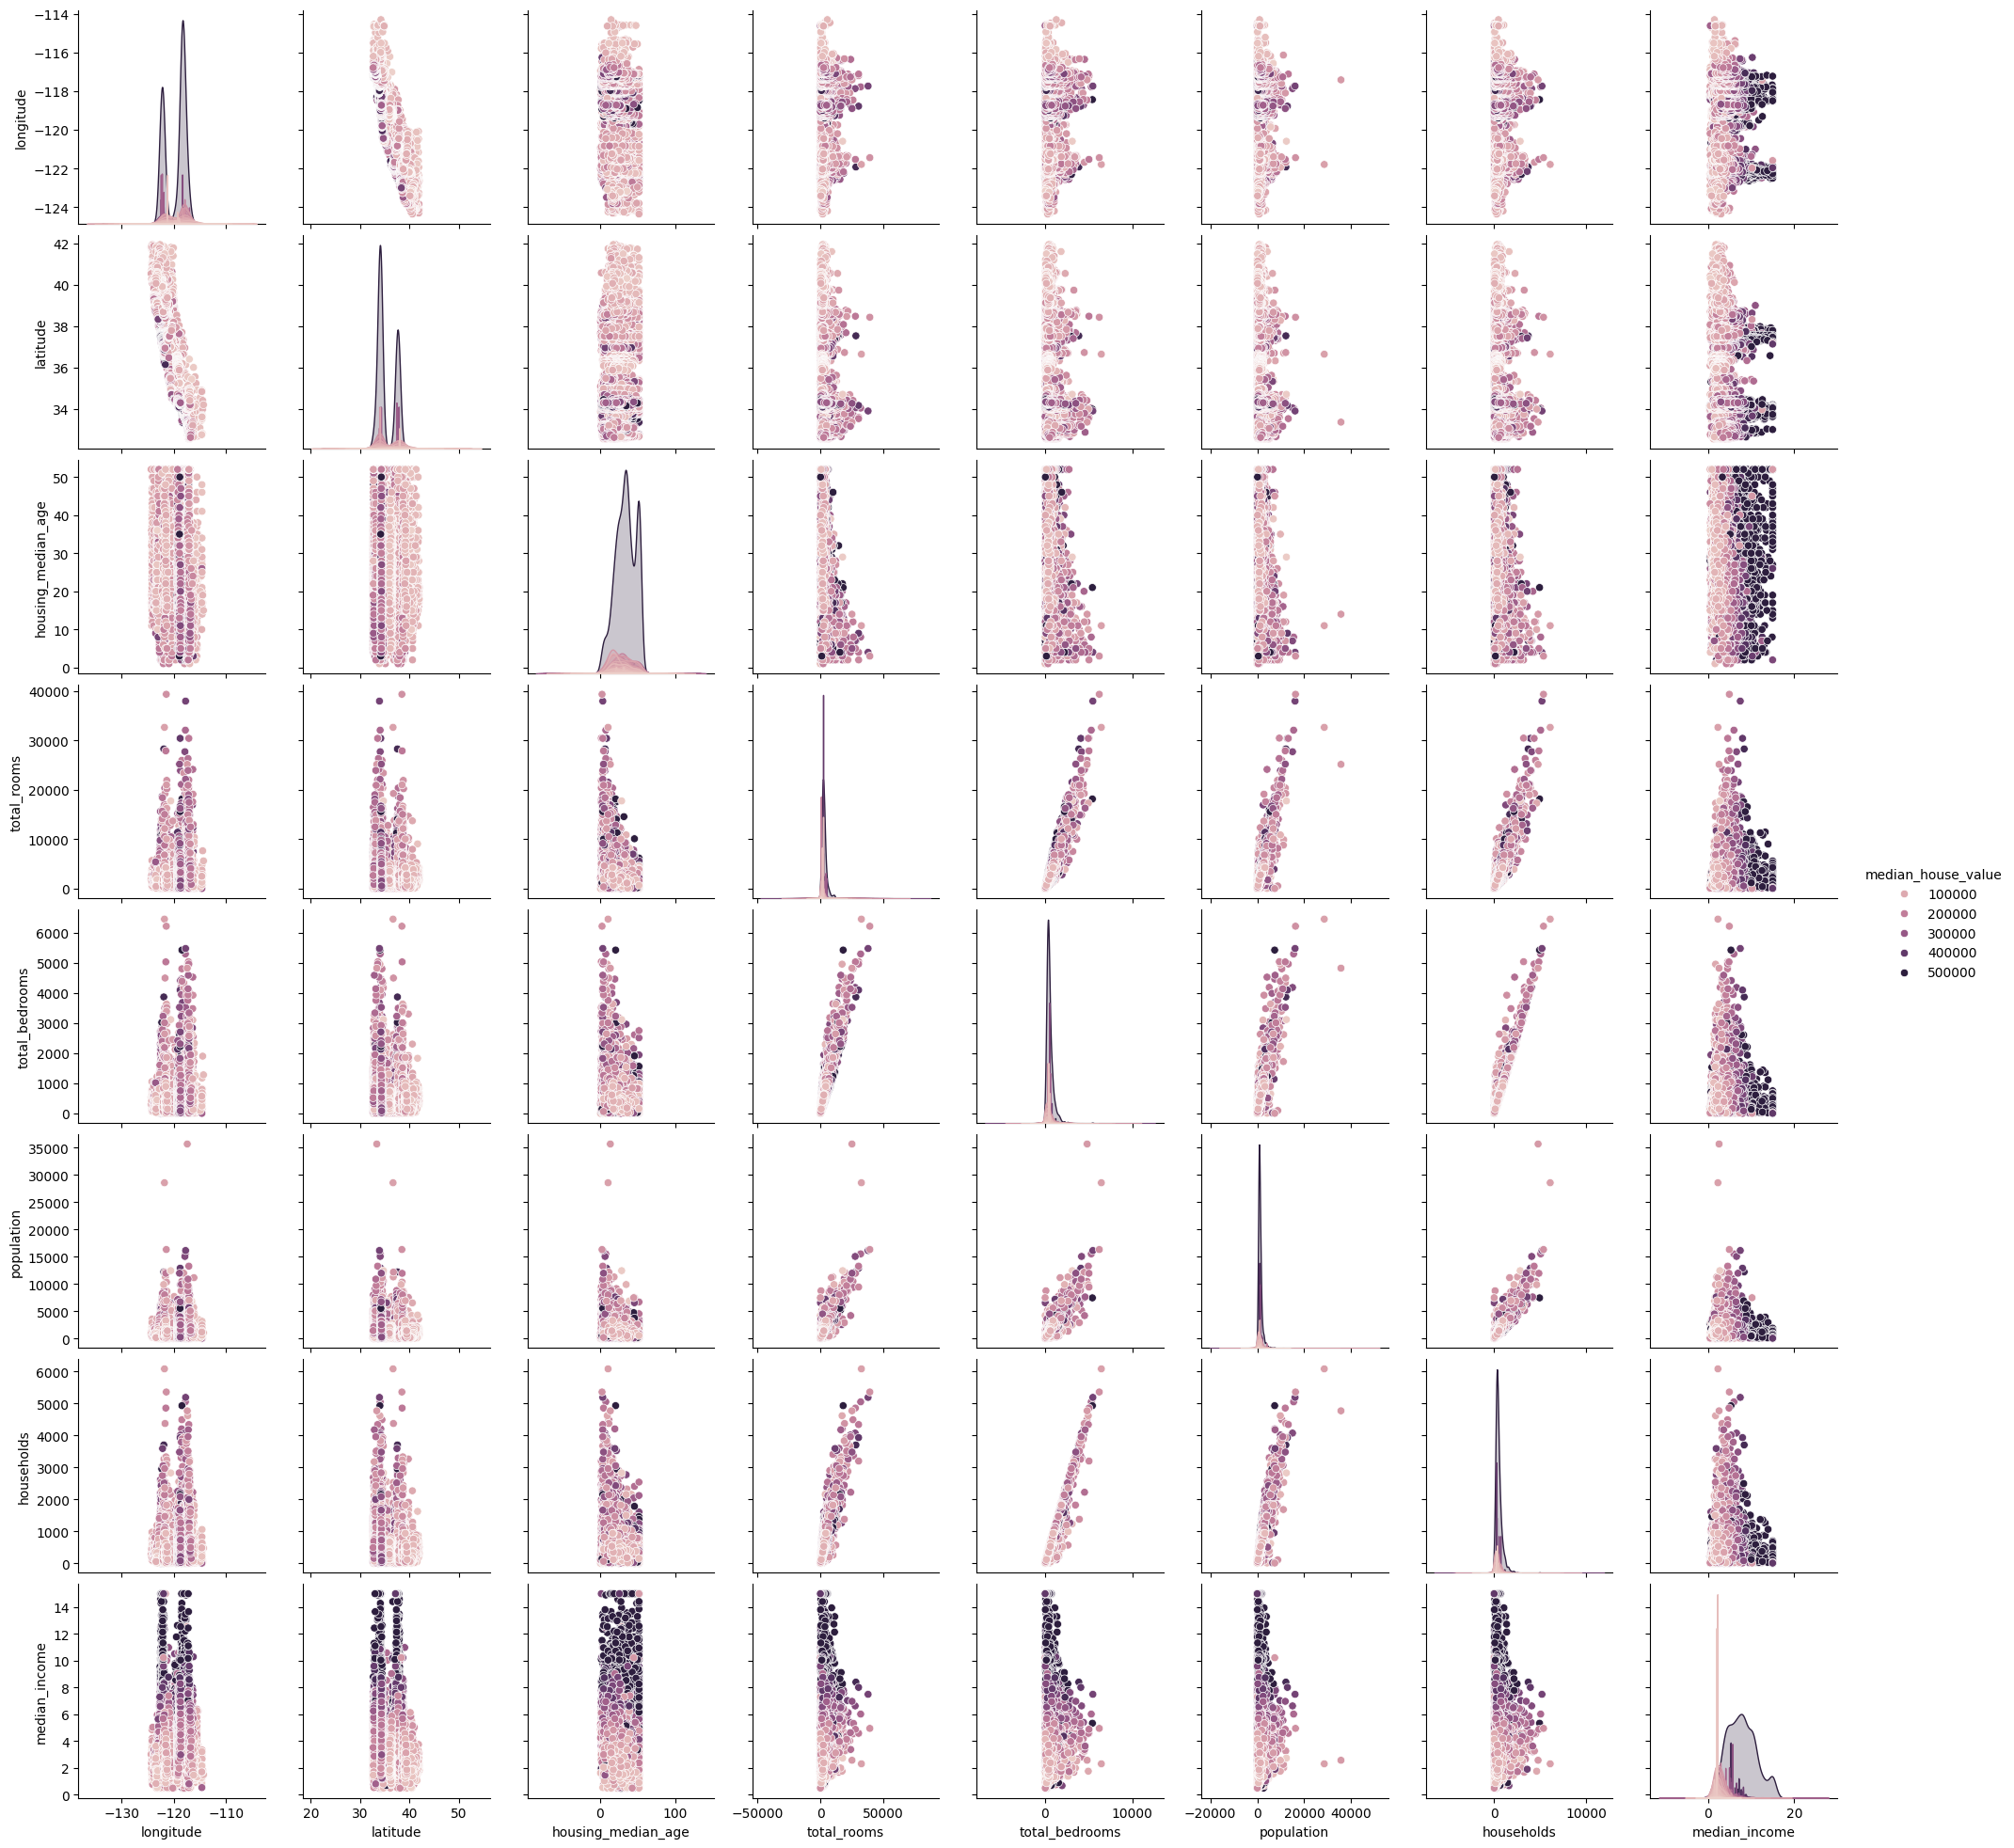

In [9]:
sns.pairplot(dataframe,hue="median_house_value")
plt.show()

In [5]:
dataframe.isna().sum()
#so using mean to substitute others
dataframe["total_bedrooms"].fillna(dataframe["total_bedrooms"].mean(),inplace=True)

C:\Users\yenug\AppData\Local\Temp\ipykernel_10928\1496706801.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe["total_bedrooms"].fillna(dataframe["total_bedrooms"].mean(),inplace=True)


In [6]:
print(dataframe.isna().sum())
cols=dataframe.columns

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64


In [7]:
object_list=[]
number_list=[]
for i in cols:

        if(dataframe[i].dtype=="object"):
                object_list.append(i)
        else:
                number_list.append(i)
print(object_list)
print(number_list)

['ocean_proximity']
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']


In [8]:
print(dataframe["ocean_proximity"].value_counts())

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataframe[object_list[0]]=encoder.fit_transform(dataframe[object_list[0]])

list_of_obj_classes=encoder.classes_


In [10]:
print(list_of_obj_classes)
print(dataframe["ocean_proximity"].value_counts())

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']
ocean_proximity
0    9136
1    6551
4    2658
3    2290
2       5
Name: count, dtype: int64


In [11]:
print(dataframe.dtypes)

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity         int32
median_house_value      int64
dtype: object


In [12]:
X=dataframe.drop(columns=["median_house_value"],inplace=False)
y=dataframe["median_house_value"]
print(X.shape)
print(y.shape)

(20640, 9)
(20640,)


In [13]:
X=X.to_numpy()
y=y.to_numpy()
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

(20640, 9)
(20640,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [14]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16512, 9)
(4128, 9)
(16512,)
(4128,)


In [15]:
import torch as t
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
x_train=t.from_numpy(x_train)
x_test=t.from_numpy(x_test)
y_train=t.from_numpy(y_train)
y_test=t.from_numpy(y_test)


In [16]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

torch.Size([16512, 9])
torch.Size([4128, 9])
torch.Size([16512])
torch.Size([4128])


In [17]:
class Dataset_loader(Dataset):
        def __init__(self,X,Y):
                self.x=X
                self.y=Y
        def __len__(self):
                return len(self.y)
        def __getitem__(self, index):
                return self.x[index],self.y[index]
        
                

In [18]:
train_dataset=Dataset_loader(X=x_train,Y=y_train)
test_dataset=Dataset_loader(X=x_test,Y=y_test)
print(train_dataset.__len__())
print(test_dataset.__len__())

16512
4128


In [19]:
train_dataloader=DataLoader(
        dataset=train_dataset,
        shuffle=True,
        batch_size=32,
        num_workers=0,
        drop_last=True,
        pin_memory=False,

)
test_dataloader=DataLoader(
        dataset=test_dataset,
        shuffle=True,
        batch_size=32,
        num_workers=0,
        drop_last=True,
        pin_memory=False,
        
)
print(len(train_dataloader))
print(len(test_dataloader))


516
129


In [20]:
batch_size=32
print(batch_size*len(train_dataloader))
print(batch_size*len(test_dataloader))

16512
4128


In [21]:
import torch.nn as nn
class Model(nn.Module):
        def __init__(self,input_size,hidden_size,output_size):
                super().__init__()
                self.layer1=nn.Sequential(
                        nn.Linear(in_features=input_size,out_features=hidden_size),
                        nn.ReLU(),
                        nn.Linear(hidden_size,hidden_size*2),
                        nn.Dropout(p=0.2),
                        nn.ReLU(),
                        nn.Linear(hidden_size*2,hidden_size*3),
                        nn.ReLU(),
                        nn.LazyLinear(out_features=hidden_size*2),
                        nn.Dropout(p=0.1),
                        nn.LazyLinear(out_features=output_size),
                        nn.LazyLinear(out_features=output_size)
                )
        def forward(self,x):
                return self.layer1(x)
        

In [27]:
Model_for_lr=Model(
        input_size=9,
        output_size=1,
        hidden_size=64
)

In [28]:
from torchinfo import summary
summary(
        model=Model_for_lr,
        input_size=(32,9),
        col_names=["input_size","output_size","trainable","num_params"]
        )

Layer (type:depth-idx)                   Input Shape               Output Shape              Trainable                 Param #
Model                                    [32, 9]                   [32, 1]                   True                      --
├─Sequential: 1-1                        [32, 9]                   [32, 1]                   True                      --
│    └─Linear: 2-1                       [32, 9]                   [32, 64]                  True                      640
│    └─ReLU: 2-2                         [32, 64]                  [32, 64]                  --                        --
│    └─Linear: 2-3                       [32, 64]                  [32, 128]                 True                      8,320
│    └─Dropout: 2-4                      [32, 128]                 [32, 128]                 --                        --
│    └─ReLU: 2-5                         [32, 128]                 [32, 128]                 --                        --
│    └─Linear: 

In [31]:
list=[t.numel(param) for param in Model_for_lr.parameters()]
print(list)
print(sum(list))

[576, 64, 8192, 128, 24576, 192, 24576, 128, 128, 1, 1, 1]
58563


In [44]:
optimizer=t.optim.Adam(params=Model_for_lr.parameters(),lr=0.0001)
lossfn=t.nn.HuberLoss()

In [45]:
epochs=20
train_loss_list=[]
test_loss_list=[]
train_acc_list=[]
test_acc_list=[]
Model_for_lr.to(t.float32)
for epoch in range(epochs):
        train_acc=0
        train_loss=0
        test_acc=0
        test_loss=0
        Model_for_lr.train()
        for batch in train_dataloader:
                (x,y)=batch
                x=x.to(t.float32)
                y=y.to(t.float32)
                y_preds=Model_for_lr(x)
                loss=lossfn(y_preds,y)
                train_loss+=loss.item()
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
        with t.inference_mode():
                Model_for_lr.eval()
                for batch in test_dataloader:
                        (x,y)=batch
                        x=x.to(t.float32)
                        y=y.to(t.float32)
                        y_preds=Model_for_lr(x)
                        loss=lossfn(y_preds,y)
                        test_loss+=loss.item()
        train_loss_list.append(train_loss/len(train_dataloader.dataset))
        test_loss_list.append(test_loss/len(test_dataloader.dataset))

        print(f"Epoch : {epoch}")
        print(f"The loss value of the training  : {train_loss_list[epoch]}")
        print(f"The loss value of the testing  : {test_loss_list[epoch]}")



Epoch : 0
The loss value of the training  : 2790.5870673601016
The loss value of the testing  : 2738.901148596475
Epoch : 1
The loss value of the training  : 2790.563423334166
The loss value of the testing  : 2738.3892784414365
Epoch : 2
The loss value of the training  : 2789.7493816050446
The loss value of the testing  : 2736.5042923328488
Epoch : 3
The loss value of the training  : 2790.8670677953914
The loss value of the testing  : 2738.1592667453974
Epoch : 4
The loss value of the training  : 2789.4137348500335
The loss value of the testing  : 2738.507135908733
Epoch : 5
The loss value of the training  : 2789.703660122184
The loss value of the testing  : 2736.256228424782
Epoch : 6
The loss value of the training  : 2789.3209476914517
The loss value of the testing  : 2738.224105953246
Epoch : 7
The loss value of the training  : 2789.073103557261
The loss value of the testing  : 2741.7425593886264
Epoch : 8
The loss value of the training  : 2790.2314244943072
The loss value of the te

In [ ]:
#model did not improve